In [1]:
import pyvista as pv
import numpy as np
import pandas as pd
import sys
import os
import json
from pyvistaqt import BackgroundPlotter 
#Packages which allows for background plotting from Qt library
#PyQt5 and PySide2 are two Python Qt libraries. Pyside is required for pyvistaqt to work 


In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# I - Import of perfusion data from an excel spreadsheet

a - Import the excel file

In [3]:
#Import the CSV file containing the data containing the microspheres coordinates and perfusion values. Here, an ouput file from the gamma well counter is imported as an example
data = pd.read_csv("OneDrive\\Desktop\\uiuc\\Labwork\\Thesis project\\code\\Pig_exp_4\\Cu-64 Counts1889_original_file.csv", usecols=[2,5,7,11,14], engine='python')

#Drop the rows countaining no coordinates
data=data.dropna().reset_index(drop=True)




b - Give the experiment microspheres parameters

In [4]:
data

,Measurement date & time,Rack,Pos,Cu-64 CPM,Coordinates
0,3/11/2021 18:00,1,1,1014.01,"[7,-1,0]"
1,3/11/2021 18:01,1,2,1209.76,"[7,0,0]"
2,3/11/2021 18:02,1,3,933.12,"[7,1,0]"
3,3/11/2021 18:03,1,4,310.94,"[7,2,0]"
4,3/11/2021 18:05,1,5,1356.29,"[6,-1,0]"
5,3/11/2021 18:06,1,6,1197.71,"[6,0,0]"
6,3/11/2021 18:07,1,7,1236.85,"[6,1,0]"
7,3/11/2021 18:08,1,8,416.53,"[6,2,0]"
8,3/11/2021 18:09,1,9,498.05,"[6,3,0]"
9,3/11/2021 18:11,1,10,1677.54,"[5,-2,0]"


c - Extract the perfusion values from the excel

In [5]:
#Extract the column containing the perfusion values from the imported data and change the values type from object to float
perfusion=data['Cu-64 CPM'].astype(np.float)

#Extract the column containing the corrdinate values from the imported data 
coordinates = data["Coordinates"]

# Change the type from each element of the coordinate list from 'object" to "list'
res=[]
for element in coordinates:
    res.append(json.loads(element))
    coordinates=res

    
#Create a 3D array with each axis length equals to the amplitude of values taken by the coordinates
max_zgrid=coordinates[0][2]
min_zgrid=coordinates[0][2]
max_xgrid=coordinates[0][0]
min_xgrid=coordinates[0][0]
max_ygrid=coordinates[0][1]
min_ygrid=coordinates[0][1]
for i in range (len(coordinates)):
    if coordinates[i][0] > max_xgrid:
        max_xgrid=coordinates[i][0]
    if coordinates[i][0] < min_xgrid:
        min_xgrid=coordinates[i][0]
    if coordinates[i][1] > max_ygrid:
        max_ygrid=coordinates[i][1]
    if coordinates[i][1] < min_ygrid:
        min_ygrid=coordinates[i][1]
    if coordinates[i][2] > max_zgrid:
        max_zgrid=coordinates[i][2]
    if coordinates[i][2] < min_zgrid:
        min_zgrid=coordinates[i][2]
    
x_gridsize= (max_xgrid-min_xgrid+1)
y_gridsize= (max_ygrid-min_ygrid+1)
z_gridsize= (max_zgrid-min_zgrid+1)

#Initialization : create an empty array with zeros
perfusion_3D=np.zeros((z_gridsize,x_gridsize,y_gridsize))



In [6]:
#Fill the array with the cell data
for i in range (len(coordinates)):
    x=np.int(coordinates[i][0])-min_xgrid # Indexing problem, coodinates cannot be negative. Translating coordinates so that all are postive 
    
    y=np.int(coordinates[i][1])-min_ygrid # same
    
    z=np.int(coordinates[i][2]) # z>0 so no need for translation 
    perfusion_3D[z][x][y]=perfusion[i]
    
   

# II - Optional: Import of perfusion data from a PET  file

This optional step is to compare a previously acquired PET/CT image with the microsphere signal after radioisotpe injection and  trimming of the tissue. The comparaison between both PET/CT and microsphere data was used to assess the precision of the cutting 

a - Extract info from header file

In [7]:
#Opening header file of the PET image. A PET image acquired form a chicken breast is used as an example
PET_header = open(r"OneDrive\\Desktop\\uiuc\\Labwork\\Thesis project\\code\\Pig_exp_4\\test.txt", encoding="utf-8" 
)

In [8]:
lines=PET_header.readlines()
PET_header.close()

In [9]:
# Extract shape, spacing and encoding of the PET file
# look for patterns such as filename, resolution, pixel dimension
for line in lines:
    # find data type
    if line.find('data_type') != -1: #-1 indicates that the data is not found 
        data_type = line.split()     #Create a list, each element being a word
        print(data_type)
        if data_type[1] == '2':
            dtype = 'type: int16' + '\n'  # 2-byte integer - Intel style
        else:
             dtype =np.dtype('<f') # (little-endian) 4 byte float -Intel style 

    if line.find('x_dimension') != -1:
            x_PET_dim = line.split()
            print(x_PET_dim)
    if line.find('y_dimension') != -1:
            y_PET_dim = line.split()
            print(y_PET_dim)
    if line.find('z_dimension') != -1:
            z_PET_dim = line.split()
            print(z_PET_dim)
    if line.find('pixel_size_x') != -1:
            x_PET_spacing = line.split()
            print(x_PET_spacing)
    if line.find('pixel_size_y') != -1:
            y_PET_spacing = line.split()
            print(y_PET_spacing)
    if line.find('pixel_size_z') != -1:
            z_PET_spacing = line.split()
            print(z_PET_spacing)

            
#shape is a list of size 3 containing the dimensions in the following order: x,y,z          
PET_shape=(int(x_PET_dim[1]),int(y_PET_dim[1]),int(z_PET_dim[1]))
#spacing is a list of size 3 containing the size of x,y and z pizels in mm.
PET_spacing=(x_PET_spacing[1],y_PET_spacing[1],z_PET_spacing[1])

#others is a temporary variable containing information from the header file that might be useful in the future. Type of datafile could also be added
others=[None] * 3
others[0] = 'dimension: 3' + '\n'
others[1]= 'encoding: raw' + '\n'
others[2] = 'endian: little' + '\n'



['data_type', '4']
['x_dimension', '128']
['y_dimension', '128']
['z_dimension', '159']
['pixel_size_x', '0.776383']
['pixel_size_y', '0.776383']
['pixel_size_z', '0.796']


b - Extract image array from the DICOM image file

In [10]:
# Reading the PET image file. Convert the binary file into a 3D matrix containing the data points 
fid = open("OneDrive\\Desktop\\uiuc\\Labwork\\Thesis project\\code\\Pig_exp_4\\20210311_Pig_experiment4_2cm_PET_900s_Cu64_PET_v2.pet.img", 'rb')
PET_data = np.fromfile(fid, dtype) # Construct an array from from the binary file 
#PET_image = data.reshape(PET_shape) # .size : number of pixels 


# III - Optional: Import the CT data 

This optional step is to compare a previously acquired PET/CT image with the microsphere signal after radioisotpe injection and  trimming of the tissue. The comparaison between both PET/CT and microsphere data was used to assess the precision of the cutting 

a - Extract information from from header file

In [11]:
#Opening file containing the parameters of the CT data. A ct image acquired form a chicken breast is used as an example
CT_header = open(r"OneDrive\\Desktop\\uiuc\\Labwork\\Thesis project\\code\\Pig_exp_4\\CT_header_copied.txt", encoding="utf-8" 
)

In [12]:
lines=CT_header.readlines()
CT_header.close()

In [13]:
# Extract shape, spacing and encoding of the CT file
# look for patterns such as filename, resolution, pixel dimension
for line in lines:
    # find data type
    if line.find('data_type') != -1: #-1 means the data is not found 
        data_type = line.split()     #Create a list, each element being a word
        print(data_type)
        if data_type[1] == '2':
            dtype = 'type: int16' + '\n'  # 2-byte integer - Intel style
        else:
             dtype =np.dtype('<f') # (little-endian) 4 byte float -Intel style 

    if line.find('x_dimension') != -1:
            x_CT_dim = line.split()
            print(x_CT_dim)
    if line.find('y_dimension') != -1:
            y_CT_dim = line.split()
            print(y_CT_dim)
    if line.find('z_dimension') != -1:
            z_CT_dim = line.split()
            print(z_CT_dim)
    if line.find('pixel_size_x') != -1:
            x_CT_spacing = line.split()
            print(x_CT_spacing)
    if line.find('pixel_size_y') != -1:
            y_CT_spacing = line.split()
            print(y_CT_spacing)
    if line.find('pixel_size_z') != -1:
            z_CT_spacing = line.split()
            print(z_CT_spacing)

            
#shape is a list of size 3 containing the dimensions in the following order: x,y,z          
CT_shape=(int(x_CT_dim[1]),int(y_CT_dim[1]),int(z_CT_dim[1]))
#spacing is a list of size 3 containing the size of x,y and z pizels in mm.
CT_spacing=(x_CT_spacing[1],y_CT_spacing[1],z_CT_spacing[1])

#others is a temporary variable containing information from the header file that might be useful in the future. Type of datafile could also be added
others_CT=[None] * 3
others_CT[0] = 'dimension: 3' + '\n'
others_CT[1]= 'encoding: raw' + '\n'
others_CT[2] = 'endian: little' + '\n'


['data_type', '2']
['x_dimension', '1024']
['y_dimension', '1024']
['z_dimension', '1542']
['pixel_size_x', '0.097231']
['pixel_size_y', '0.097231']
['pixel_size_z', '0.097231']


b - Extract image array from the DICOM image file

In [14]:
# Reading the PET image file. Convert the binary file into a 3D matrix containing the data points 
CT_fid = open("OneDrive\\Desktop\\uiuc\\Labwork\\Thesis project\\code\\Pig_exp_4\\20210311_Pig_experiment4_2cm_XST_CT_Acq_15cm_4096x4096_100um_v1.ct.img", 'rb')
CT_data = np.fromfile(CT_fid, dtype=np.int16) # Construct an array from from the binary file 


In [15]:
CT_data

array([-1000, -1000, -1000, ..., -1000, -1000, -1000], dtype=int16)

# IV - Grid and volume rendering of  perfusion datasets

a - Optional: PET grid and volume rendering

In [16]:

#Creation of a grid in which we will insert the data matrix from the PET file 
x = np.arange(0,PET_shape[0]+1,1) 
y = np.arange(0,PET_shape[1]+1,1)
z = np.arange(0,PET_shape[2]+1,1) 
xx, yy, zz = np.meshgrid(x,y,z)
PET_grid = pv.StructuredGrid(xx, yy, zz)


#Add the PET file values to the grid cell data
PET_grid.cell_arrays["PET_values"] = PET_data.flatten(order="c")  
PET_grid.spacing=PET_spacing



In [17]:
#Volume rendering    
PET_volume = pv.UniformGrid()
PET_volume.dimensions = [int(x_PET_dim[1]),int(y_PET_dim[1]),int(z_PET_dim[1])]
PET_volume["PET_values"] = PET_data.flatten(order="c") 


c - Microspheres perfusion data grid rendering

In [21]:
# perfusion_3D values corresponds to the value in each cell. The grid x,y,z corresponds to the points of the grid so len(grid)>len(perfusion_values)
# The grid coordinates are  such that the cell number corresponds to the right hand corner point of the grid. We need to add an additional point value  at the left thus the -1
# The +1 is because the arrange method doesn't take into account the last value.

x = np.arange(min_xgrid-1,max_xgrid+1,1) 
y = np.arange(min_ygrid-1,max_ygrid+1,1)
z = np.arange(min_zgrid-1,max_zgrid+1,1) 
xx, yy, zz = np.meshgrid(x,y,z)

# create the structured grid directly from the numpy arrays and plot
perfusion_grid = pv.StructuredGrid(xx, yy, zz)





# Add the data values to the cell data
perfusion_grid.cell_arrays["GWC_values"] = perfusion_3D.flatten(order="c")  


#Remove the cells that don't have any perfusion value
perfusion_grid_threshold=perfusion_grid.threshold([np.min(perfusion)-1, np.max(perfusion)+1], invert=False)

d - Optionnal: CT volume rendering 

In [22]:
#Volume rendering    
CT_volume = pv.UniformGrid()
CT_volume.dimensions = [int(x_CT_dim[1]),int(y_CT_dim[1]),int(z_CT_dim[1])]
CT_volume["CT_values"] = CT_data.flatten(order="c") 

# V - Plotting

a - Plotting of the perfusion data

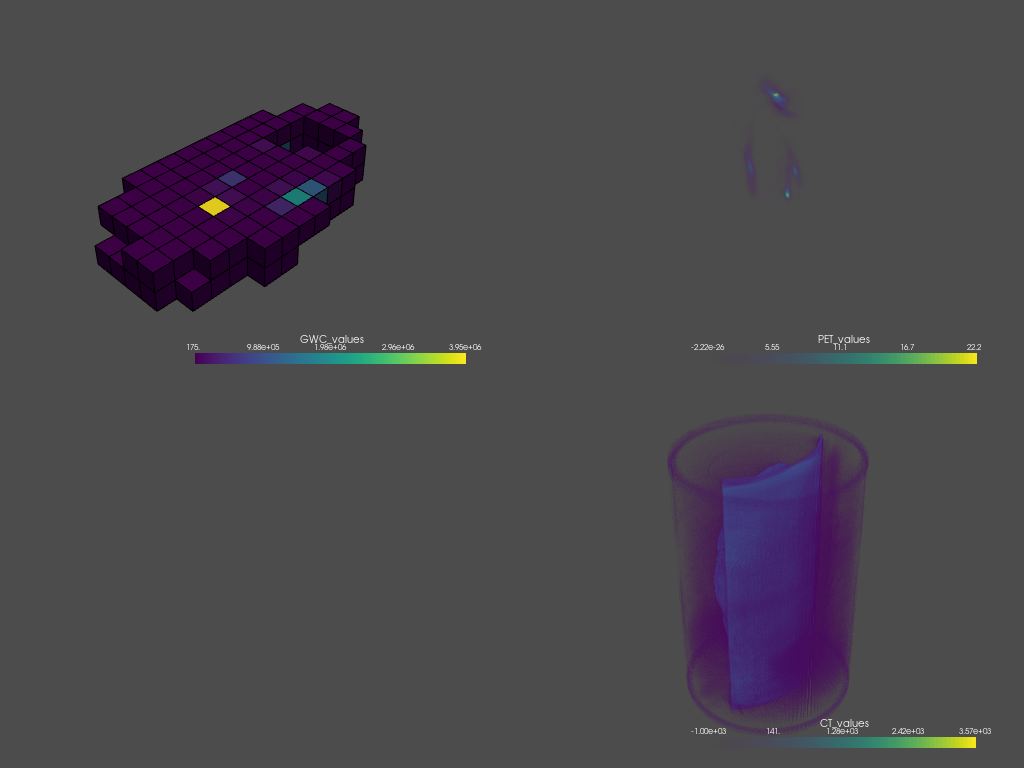

[(2869.0289989702474, 2869.0289989702474, 3128.0289989702474),
 (511.5, 511.5, 770.5),
 (0.0, 0.0, 1.0)]

In [44]:
p = pv.Plotter(shape=(2,2), border=False)

p.add_mesh(perfusion_grid_threshold,show_edges=True)

#Optional
p.subplot(0, 1)
p.add_volume(PET_volume, cmap="viridis", 
             mapper="smart")
p.subplot(1, 1)
p.add_volume(CT_volume, cmap="viridis", 
             mapper="smart")





p.show()

b - Background plotting

In [23]:
# Background ploting allows to visualize the perfusion data in interactive prompt.
plotter=BackgroundPlotter()


plotter.add_mesh_threshold(perfusion_grid_threshold,show_edges=True)

#Plot the inital outline
outline=perfusion_grid.outline()
plotter.add_mesh(outline, color="k")


rend=plotter.show()